In [25]:
from imports import *

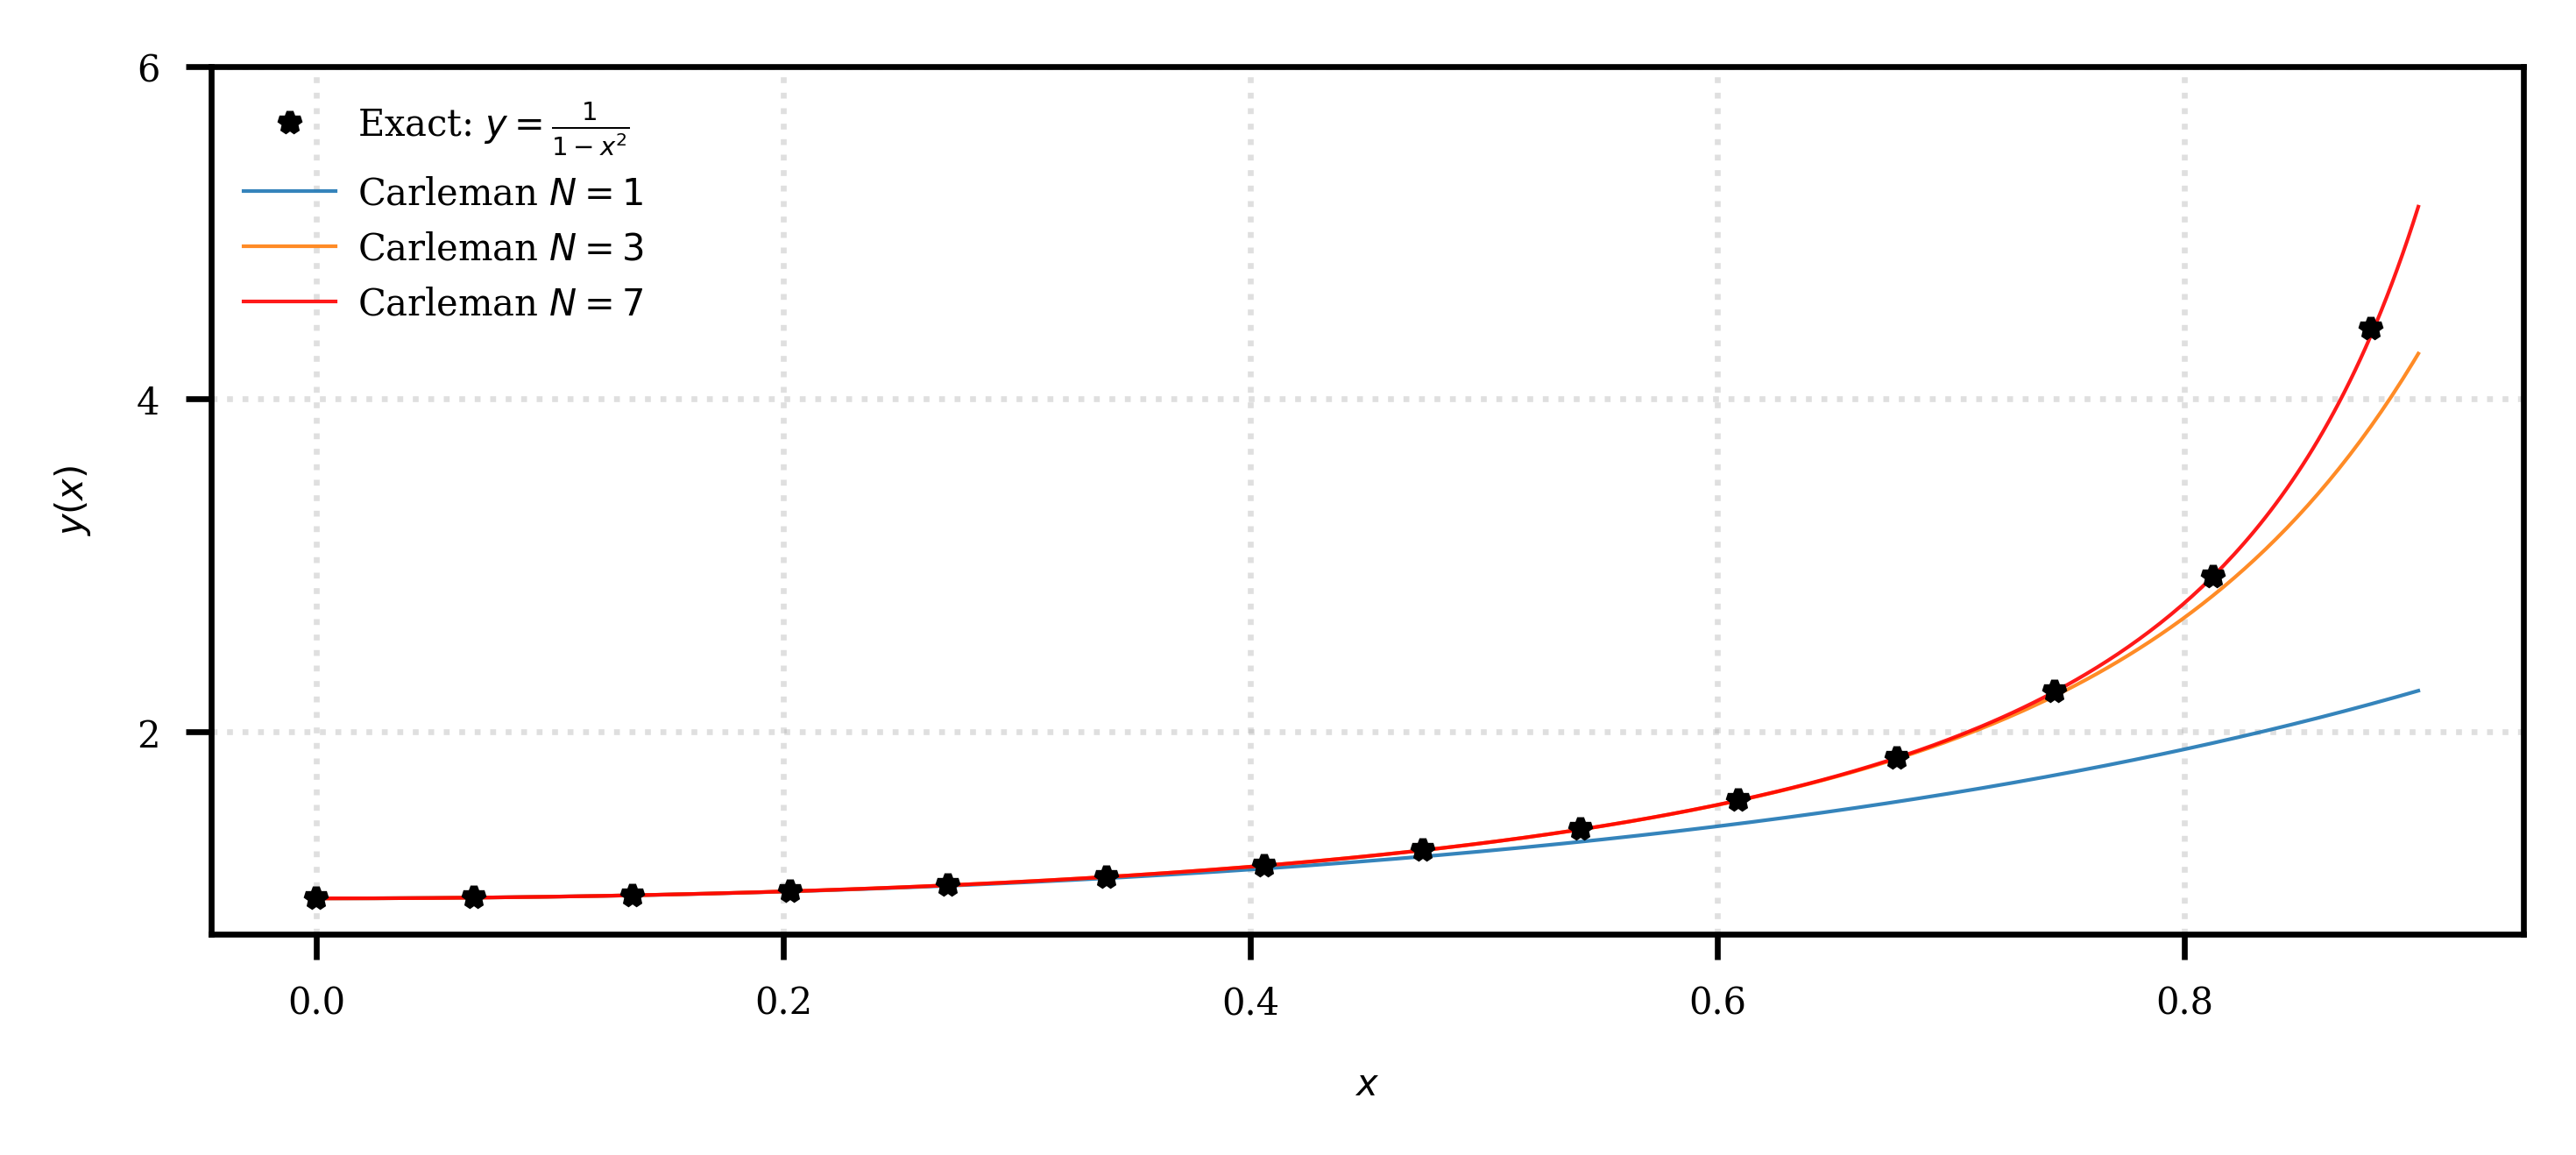

In [12]:
"""
Quadratic Model:
    dy/dx = 2*x*y + 2*x^3*y^2,   y(0)=1

Analytical solution:  y = 1 / (1 - x^2)
Plot y(x) (x ≥ 0) — exact solution shown with sparse * markers,
Carleman solutions drawn as smooth lines.
"""

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import rcParams

# --- Matplotlib style for publications ---
rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "axes.labelsize": 5,
    "axes.titlesize": 6,
    "legend.fontsize": 1,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "lines.linewidth": 0.5,
    "figure.dpi": 600,
})

# --- Analytical solution ---
def y_exact(x):
    return 1.0 / (1.0 - x**2)

# --- Carleman matrix for truncation order N ---
def A_matrix(x, N):
    A = np.zeros((N, N))
    for i in range(N):
        k = i + 1
        A[i, i] = 2.0 * k * x
        if i < N - 1:
            A[i, i + 1] = 2.0 * k * x**3
    return A

# --- RHS of truncated linear system ---
def carleman_rhs(x, z, N):
    return A_matrix(x, N) @ z

# --- Integrate system for given truncation order ---
def integrate_truncation(N, x_grid):
    z0 = np.ones(N)
    sol = solve_ivp(lambda t, y: carleman_rhs(t, y, N),
                    [x_grid[0], x_grid[-1]], z0,
                    t_eval=x_grid, rtol=1e-9, atol=1e-12)
    if not sol.success:
        raise RuntimeError(f"Integration failed for N={N}")
    return sol.y[0, :]  # return z1 ≈ y(x)

# --- Simulation setup ---
x_grid = np.linspace(0, 0.9, 400)
y_true = y_exact(x_grid)
truncation_orders = [1, 3, 7]

# --- Compute approximations ---
y_approx = {N: integrate_truncation(N, x_grid) for N in truncation_orders}

# --- Distinct colors for clarity ---
colors = ['#1f77b4', '#ff7f0e', '#FF0000', '#9467bd', '#d62728']

# --- Plot setup ---
plt.figure(figsize=(5, 2))

# 🔹 Exact analytical solution (sparse black stars only)
plt.plot(x_grid, y_true,
         linestyle='None',
         marker='*', color='black',
         markersize=3,
         markevery=30,
         label=r"Exact: $y = \frac{1}{1 - x^2}$",
         zorder=10)

# 🔹 Carleman approximations (smooth colored lines only)
for idx, N in enumerate(truncation_orders):
    plt.plot(x_grid, y_approx[N],
             linestyle='-', color=colors[idx % len(colors)],
             label=fr"Carleman $N={N}$", alpha=0.9)

# --- Labels and styling ---
plt.xlabel(r"$x$", labelpad=6)
plt.ylabel(r"$y(x)$", labelpad=6)
# plt.title("Analytical vs Carleman Linearized Solutions (x ≥ 0)", pad=10)
plt.grid(True, linestyle=":", alpha=0.4)

# --- Legend below the plot ---
# plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15),
#            ncol=3, frameon=False)
# --- Legend inside the plot (top-right corner, transparent background) ---
plt.legend(
    loc="upper left",      # inside top-right area
    frameon=False,          # no box outline (clean look)
    fontsize=5,
    handlelength=2.5,
    handletextpad=0.6,
)
plt.tight_layout()
plt.yticks([2,4,6])
plt.subplots_adjust(bottom = 0.1)
plt.show()

### **Visualizing in 3D**

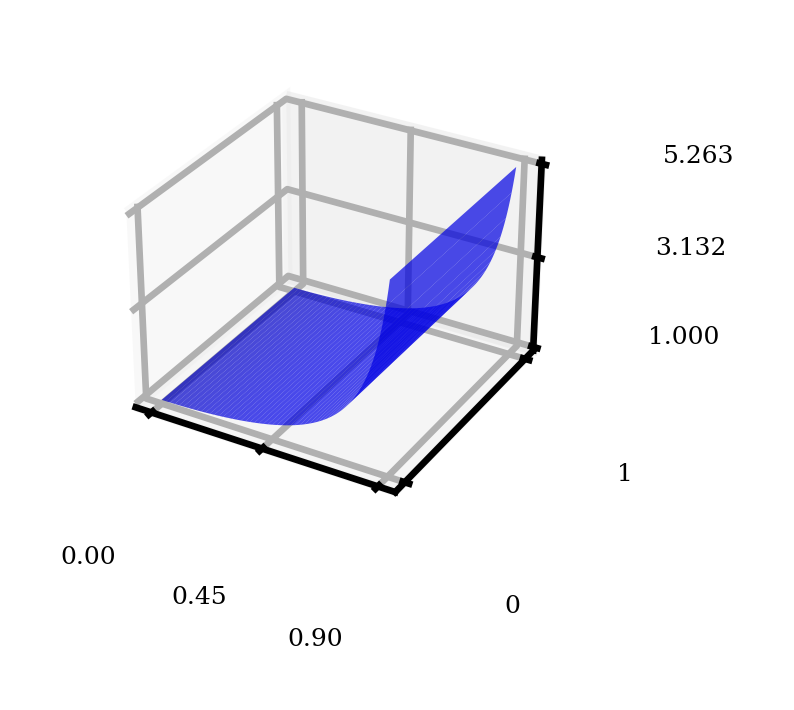

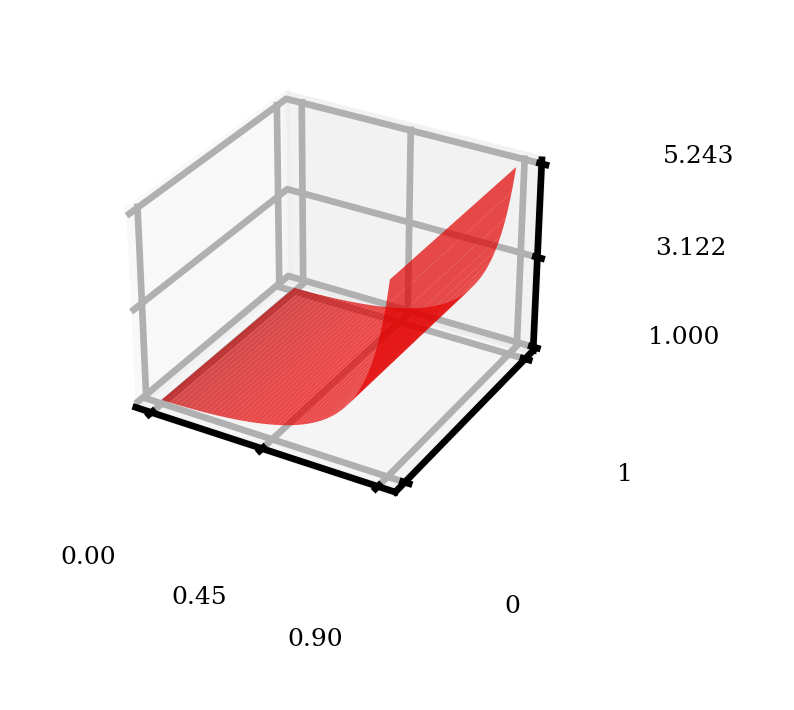

In [13]:
# --- Data ---
x_grid = np.linspace(0, 0.9, 200)
y_true = y_exact(x_grid)
y_carl = integrate_truncation(10, x_grid)

# --- Prepare surface arrays ---
X_true, Y_true = np.meshgrid(x_grid, [0,1])
Z_true = np.tile(y_true, (2,1))

X_carl, Y_carl = np.meshgrid(x_grid, [0,1])
Z_carl = np.tile(y_carl, (2,1))

# --- First figure: Analytical ---
fig1 = plt.figure(figsize=(2.5,1))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X_true, Y_true, Z_true, color='blue', alpha=0.7)
ax1.set_xticks(np.linspace(0,0.9,3))
ax1.set_yticks([0,1])
ax1.set_zticks(np.linspace(np.min(y_true), np.max(y_true), 3))
ax1.tick_params(axis='x', labelsize=3)
ax1.tick_params(axis='y', labelsize=3)
ax1.tick_params(axis='z', labelsize=3)
ax1.set_xlabel("x", fontsize=3)
ax1.set_ylabel("", fontsize=3)
ax1.set_zlabel("y(x)", fontsize=3)

# --- Second figure: Carleman N=10 ---
fig2 = plt.figure(figsize=(2.5,1))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X_carl, Y_carl, Z_carl, color='red', alpha=0.7)
ax2.set_xticks(np.linspace(0,0.9,3))
ax2.set_yticks([0,1])
ax2.set_zticks(np.linspace(np.min(y_carl), np.max(y_carl), 3))
ax2.tick_params(axis='x', labelsize=3)
ax2.tick_params(axis='y', labelsize=3)
ax2.tick_params(axis='z', labelsize=3)
ax2.set_xlabel("x", fontsize=3)
ax2.set_ylabel("", fontsize=3)
ax2.set_zlabel("y(x)", fontsize=3)

plt.show()

### **Computing Error**

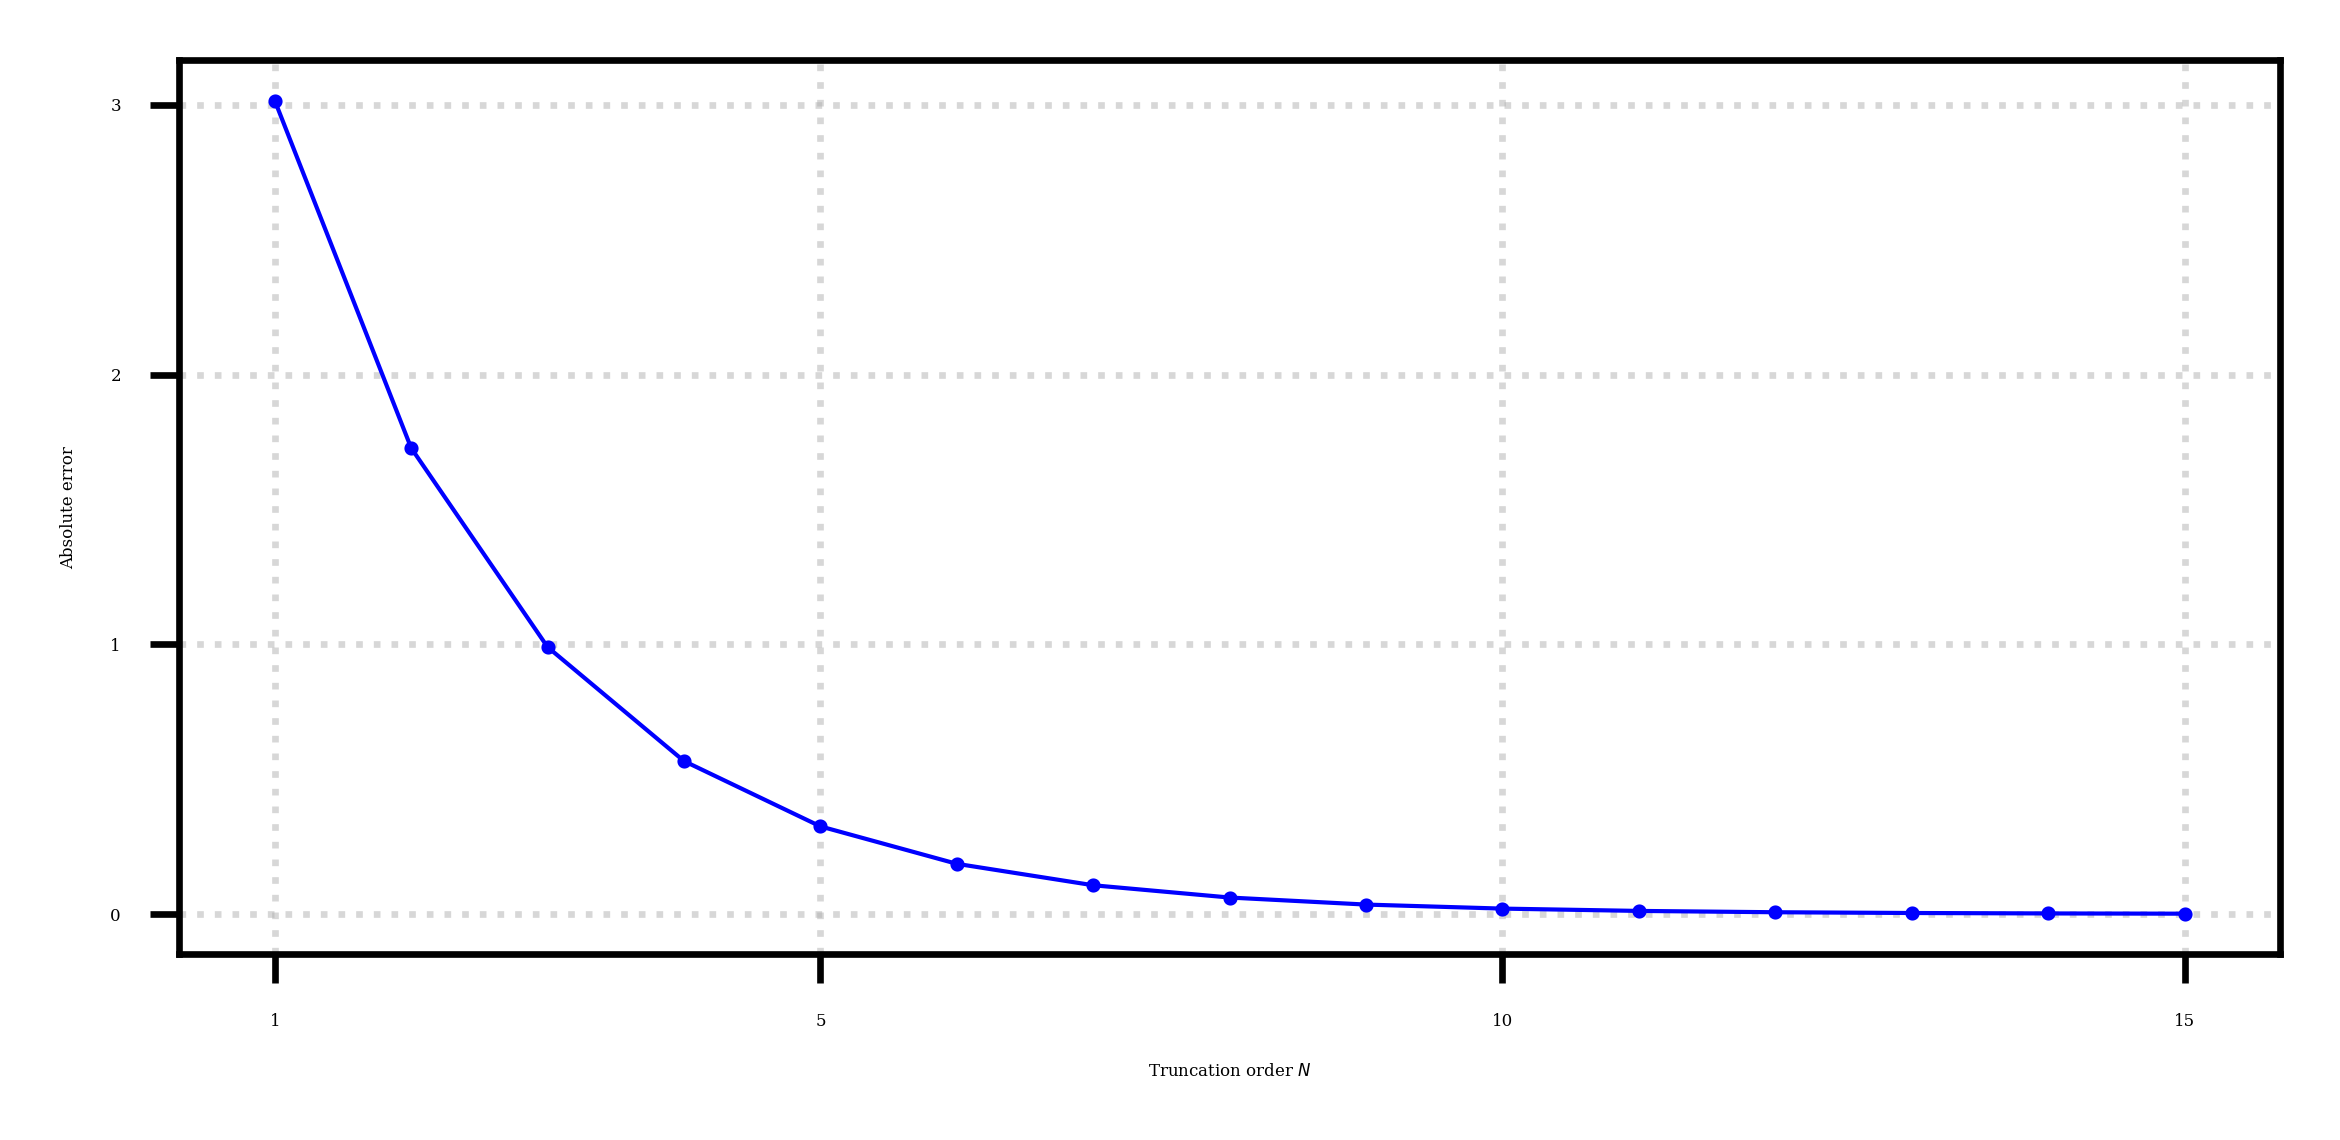

In [19]:
# --- Compute Carleman solutions for N = 1 to 15 and errors ---
max_order = 15
errors = []

for N in range(1, max_order + 1):
    y_carl = integrate_truncation(N, x_grid)
    err = np.max(np.abs(y_carl - y_true))
    errors.append(err)
    # print(f"N={N}, Max abs error = {err:.3e}")

# --- Plot Error vs N ---
plt.figure(figsize=(4,2))
plt.plot(range(1, max_order + 1), errors, marker='o', color='blue',markersize = 0.7)
plt.xlabel("Truncation order $N$", fontsize=2)
plt.ylabel("Absolute error", fontsize=2)
plt.xticks([1,5,10,15], fontsize=2)
plt.yticks([0,1,2,3],fontsize=2)
plt.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

### **Matrix and non-zero term growth**

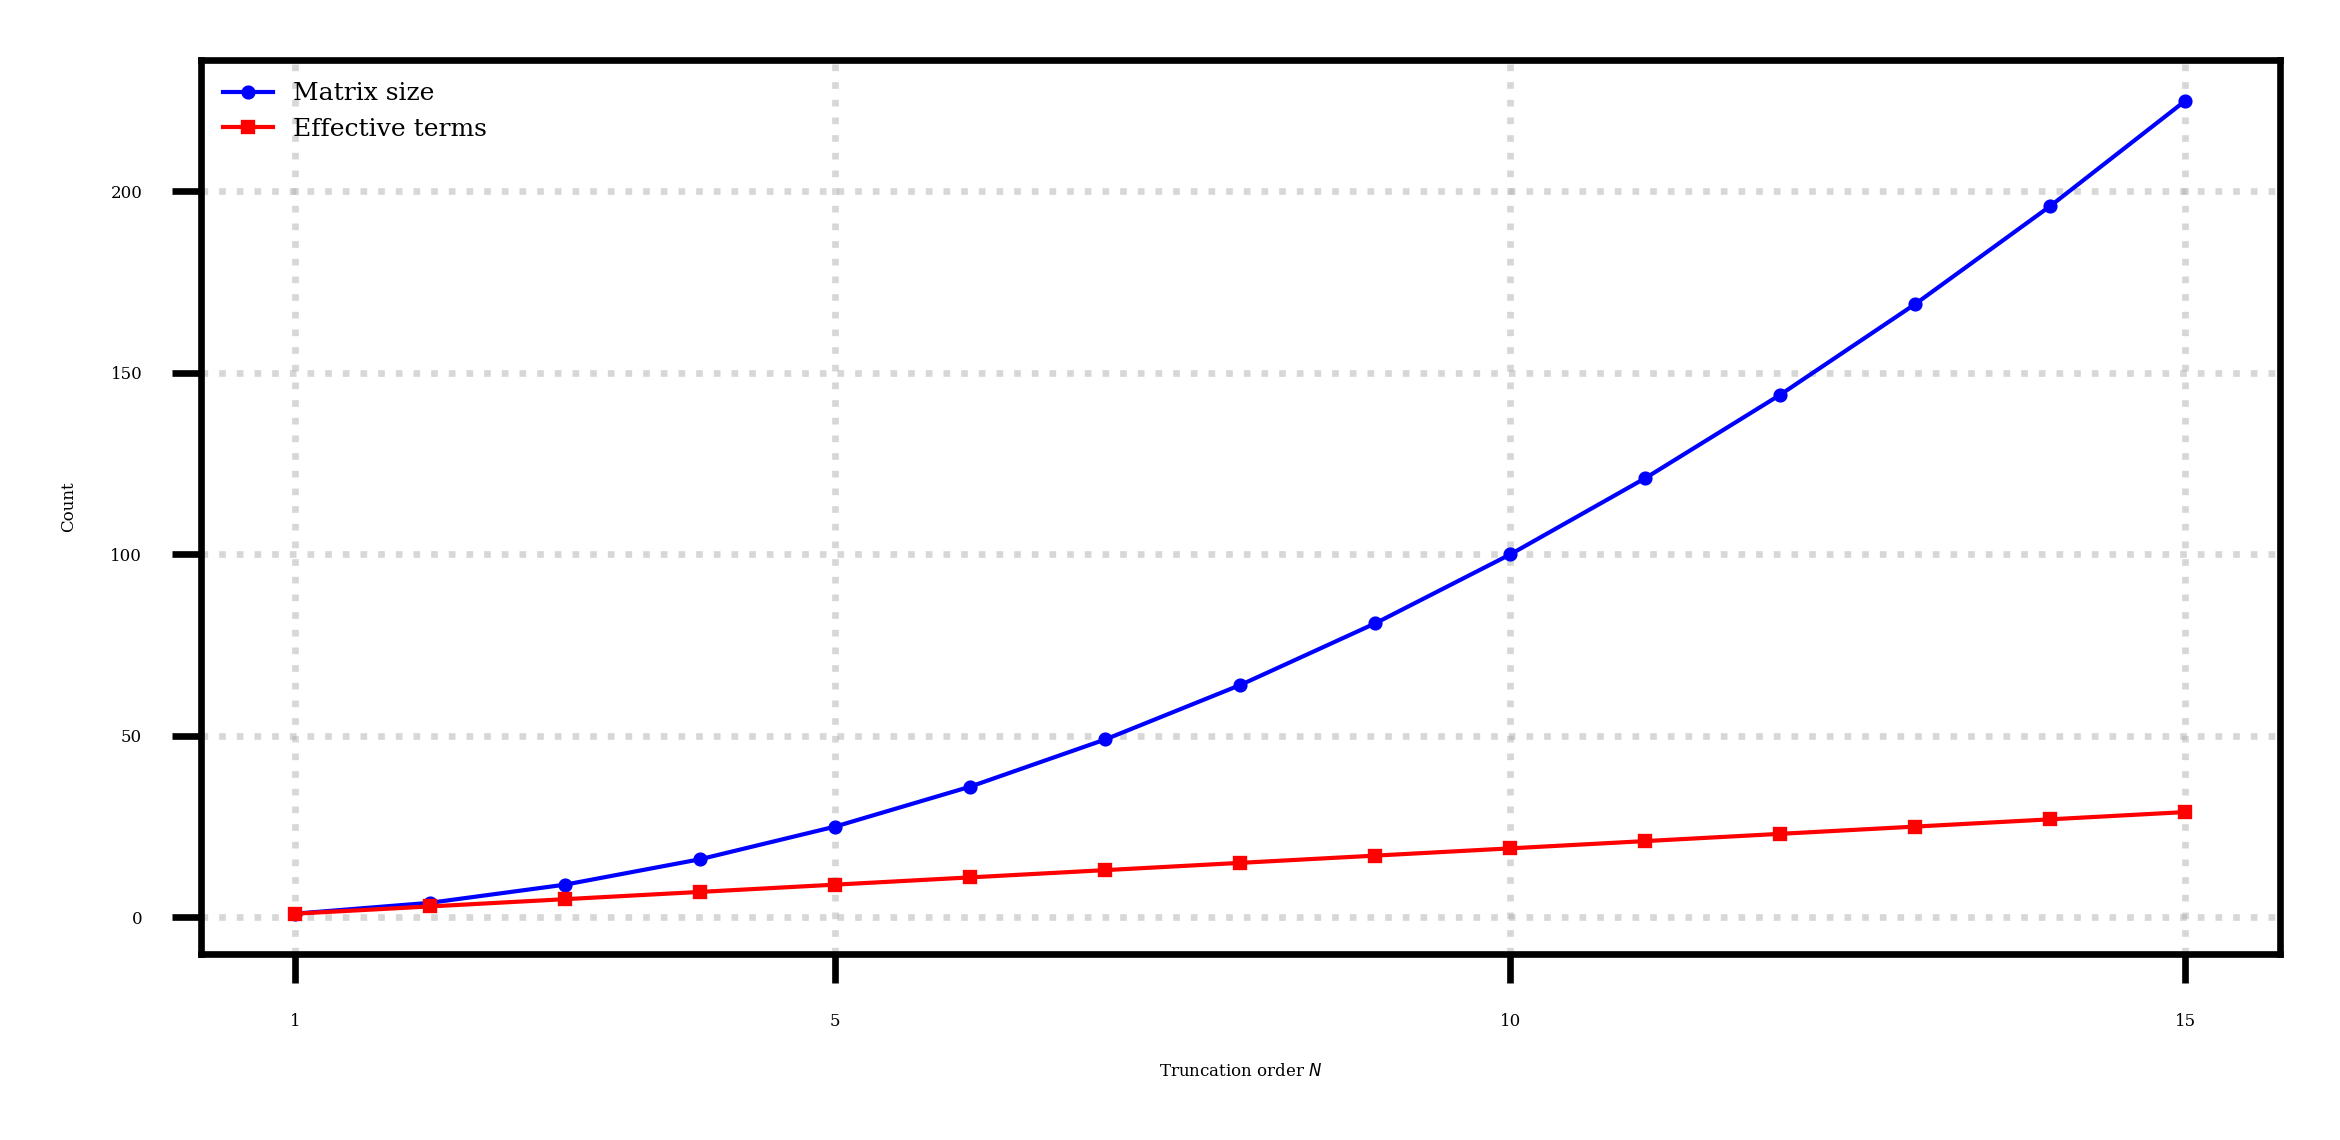

In [22]:
# --- Carleman matrix for truncation order N ---
def A_matrix(N, x_val=0.5):  # x_val is arbitrary for counting non-zero elements
    A = np.zeros((N, N))
    for i in range(N):
        k = i + 1
        A[i, i] = 2.0 * k * x_val  # diagonal
        if i < N - 1:
            A[i, i + 1] = 2.0 * k * x_val**3  # first upper diagonal
    return A

# --- Arrays to store results ---
trunc_orders = np.arange(1, 16)  # N = 1 to 15
matrix_sizes = []       # N x N
effective_terms = []    # number of non-zero elements

for N in trunc_orders:
    A = A_matrix(N)
    matrix_sizes.append(A.size)                  # total number of elements = N*N
    effective_terms.append(np.count_nonzero(A)) # count non-zero entries

# --- Plotting ---
plt.figure(figsize=(4,2))
plt.plot(trunc_orders, matrix_sizes, marker='o', color='blue', markersize=0.7, label='Matrix size')
plt.plot(trunc_orders, effective_terms, marker='s', color='red', markersize=0.7, label='Effective terms')

plt.xlabel("Truncation order $N$", fontsize=2)
plt.ylabel("Count", fontsize=2)
plt.xticks([1,5,10,15], fontsize=2)
plt.yticks(fontsize=2)
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend(frameon=False, fontsize=3)
plt.tight_layout()
plt.show()

In [23]:
# --- Truncation orders to inspect ---
trunc_orders = [1, 3, 5, 7, 10, 15]

print(f"{'N':>3} | {'Matrix size':>12} | {'Effective terms':>15}")
print("-"*36)

for N in trunc_orders:
    A = A_matrix(N)
    matrix_size = A.size                  # total elements = N*N
    effective_terms = np.count_nonzero(A) # number of non-zero elements
    print(f"{N:>3} | {matrix_size:>12} | {effective_terms:>15}")

  N |  Matrix size | Effective terms
------------------------------------
  1 |            1 |               1
  3 |            9 |               5
  5 |           25 |               9
  7 |           49 |              13
 10 |          100 |              19
 15 |          225 |              29


### **Number of Pauli and Sigma basis Decomposition terms for increasing truncation order N**

In [27]:
import itertools
# ==========================================================
# Define Pauli and Sigma operators
# ==========================================================
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

sigma_plus  = np.array([[0, 1],[0, 0]], dtype=complex)
sigma_minus = np.array([[0, 0],[1, 0]], dtype=complex)
sigma_00 = np.array([[1, 0],[0, 0]], dtype=complex)
sigma_11 = np.array([[0, 0],[0, 1]], dtype=complex)

paulis = [I, X, Y, Z]
sigmas = [sigma_plus, sigma_minus, sigma_00, sigma_11]

# ==========================================================
# Carleman matrix for dy/dx = 2xy + 2x^3 y^2
# ==========================================================
def carleman_matrix(N, x):
    A = np.zeros((N, N), dtype=float)
    for k in range(1, N+1):
        if k >= 2:
            A[k-1, k-2] += k * (2*x)
        if k+1 <= N:
            A[k-1, k] += k * (2*x**3)
    return A

# ==========================================================
# Basis generator that supports n=0 case
# ==========================================================
def tensor_basis(n, ops):
    if n == 0:
        return [np.array([[1]])]   # identity 1x1 matrix

    basis = []
    for combo in itertools.product(range(len(ops)), repeat=n):
        M = ops[combo[0]]
        for idx in combo[1:]:
            M = np.kron(M, ops[idx])
        basis.append(M)
    return basis

def count_nonzero_terms(A, basis):
    coeffs = [np.trace(B.conj().T @ A) / A.shape[0] for B in basis]
    return sum(abs(c) > 1e-10 for c in coeffs)

# ==========================================================
# Try Carleman truncation values
# ==========================================================
Ns = [5,10, 15, 20, 25]

print(f"{'N':>3} | {'Pauli terms':>12} | {'Sigma terms':>12}")
print("-"*32)

for N in Ns:
    A = carleman_matrix(N, x=1)

    # print(f"\nCarleman matrix for N = {N}:\n{A}\n")

    # Pad to nearest power of 2
    dim = 1
    while dim < N:
        dim *= 2
    A_pad = np.zeros((dim, dim), dtype=complex)
    A_pad[:N, :N] = A

    n_qubits = int(np.log2(dim))

    pauli_basis = tensor_basis(n_qubits, paulis)
    sigma_basis = tensor_basis(n_qubits, sigmas)

    pauli_count = count_nonzero_terms(A_pad, pauli_basis)
    sigma_count = count_nonzero_terms(A_pad, sigma_basis)

    print(f"{N:>3} | {pauli_count:>12} | {sigma_count:>12}")


  N |  Pauli terms |  Sigma terms
--------------------------------
  5 |           22 |            8
 10 |           60 |           18
 15 |           52 |           28
 20 |          144 |           38
 25 |          128 |           48


  0 |            0 |            0
  1 |            0 |            0
  2 |            2 |            2
  3 |            8 |            4
  4 |            7 |            6
  5 |           22 |            8
  6 |           24 |           10
  7 |           22 |           12
  8 |           18 |           14
  9 |           52 |           16
 10 |           60 |           18
 11 |           64 |           20
 12 |           60 |           22
 13 |           56 |           24
 14 |           60 |           26
 15 |           52 |           28
 16 |           41 |           30
 17 |          114 |           32
 18 |          136 |           34
 19 |          152 |           36
 20 |          144 |           38
 21 |          152 |           40
 22 |          160 |           42
 23 |          152 |           44
 24 |          136 |           46
 25 |          128 |           48
 26 |          144 |           50
 27 |          152 |           52
 28 |          144 |           54
 29 |         

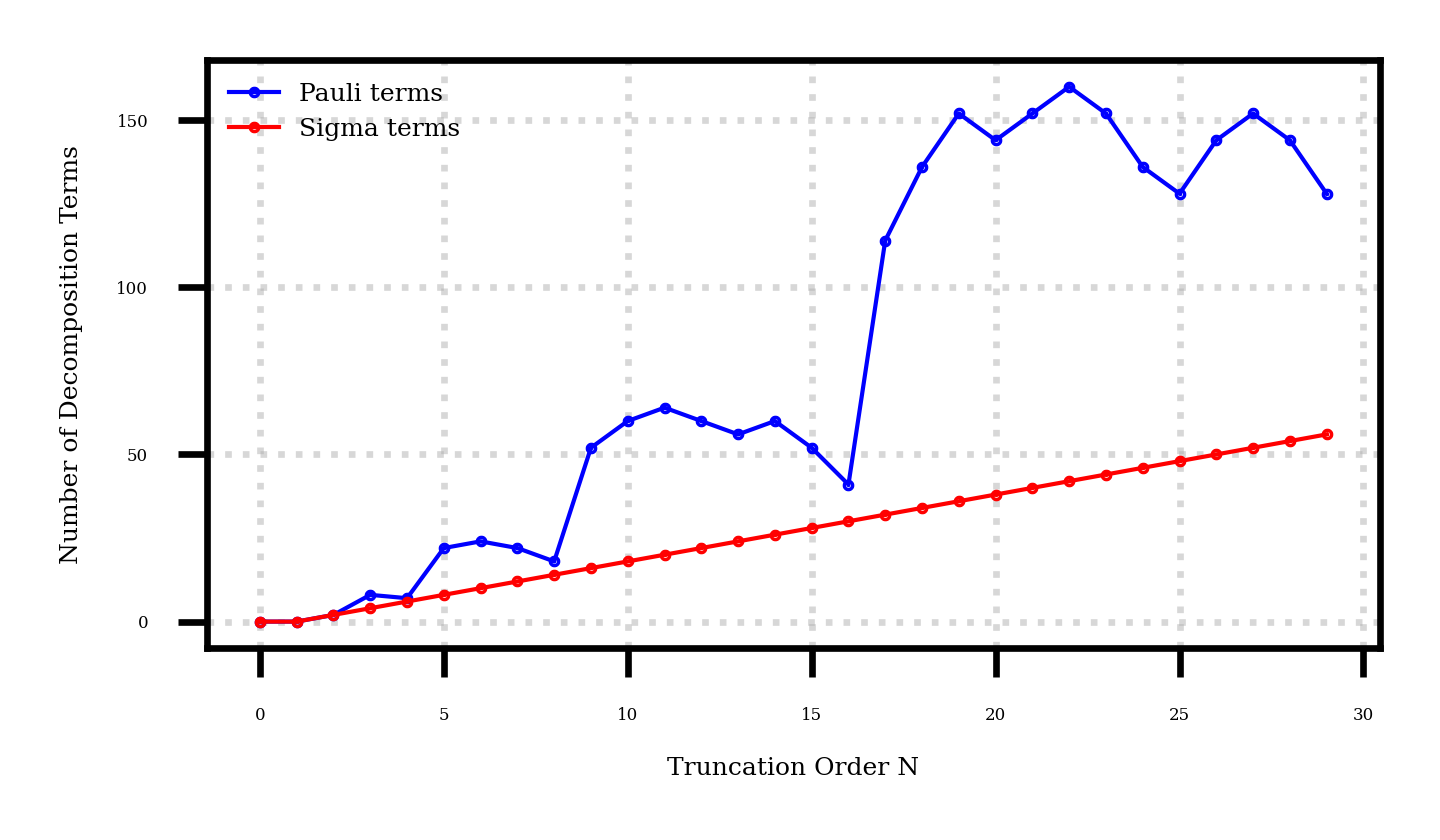

In [29]:
# ==========================================================
# Define Pauli and Sigma operators
# ==========================================================
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

sigma_plus  = np.array([[0, 1],[0, 0]], dtype=complex)
sigma_minus = np.array([[0, 0],[1, 0]], dtype=complex)
sigma_00 = np.array([[1, 0],[0, 0]], dtype=complex)
sigma_11 = np.array([[0, 0],[0, 1]], dtype=complex)

paulis = [I, X, Y, Z]
sigmas = [sigma_plus, sigma_minus, sigma_00, sigma_11]

# ==========================================================
# Carleman matrix for dy/dx = 2xy + 2x^3 y^2
# ==========================================================
def carleman_matrix(N, x):
    A = np.zeros((N, N), dtype=float)
    for k in range(1, N+1):
        if k >= 2:
            A[k-1, k-2] += k * (2*x)
        if k+1 <= N:
            A[k-1, k] += k * (2*x**3)
    return A

# ==========================================================
# Basis generator that supports n=0 case
# ==========================================================
def tensor_basis(n, ops):
    if n == 0:
        return [np.array([[1]])]   # identity 1x1 matrix

    basis = []
    for combo in itertools.product(range(len(ops)), repeat=n):
        M = ops[combo[0]]
        for idx in combo[1:]:
            M = np.kron(M, ops[idx])
        basis.append(M)
    return basis

def count_nonzero_terms(A, basis):
    coeffs = [np.trace(B.conj().T @ A) / A.shape[0] for B in basis]
    return sum(abs(c) > 1e-10 for c in coeffs)

# ==========================================================
# Try Carleman truncation values
# ==========================================================
Ns = range(30)
pauli_counts = []
sigma_counts = []

for N in Ns:
    A = carleman_matrix(N, x=1)

    # Pad to nearest power of 2
    dim = 1
    while dim < N:
        dim *= 2
    A_pad = np.zeros((dim, dim), dtype=complex)
    A_pad[:N, :N] = A

    n_qubits = int(np.log2(dim))

    pauli_basis = tensor_basis(n_qubits, paulis)
    sigma_basis = tensor_basis(n_qubits, sigmas)

    pauli_count = count_nonzero_terms(A_pad, pauli_basis)
    sigma_count = count_nonzero_terms(A_pad, sigma_basis)

    pauli_counts.append(pauli_count)
    sigma_counts.append(sigma_count)
    print(f"{N:>3} | {pauli_count:>12} | {sigma_count:>12}")

# ==========================================================
# Plot results
# ==========================================================
plt.figure(figsize=(2.5,1.5))
plt.plot(Ns, pauli_counts, marker='o', color='blue', markersize=0.4, label='Pauli terms')
plt.plot(Ns, sigma_counts, marker='o', color='red', markersize=0.4, label='Sigma terms')

# plt.title(fontsize=2)
plt.xlabel('Truncation Order N',fontsize=3)
plt.ylabel('Number of Decomposition Terms',fontsize=3)
plt.xticks(fontsize=2)
plt.yticks(fontsize=2)
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend(frameon=False, fontsize=3)
plt.tight_layout()
plt.show()